<a href="https://colab.research.google.com/github/rushikeshnaik779/EDA/blob/master/zomato_bangalore_restaurants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ZOMATO BANGLORE RESTAURANTS

### Context
I was always fascinated by the food culture of Bengaluru. Restaurants from all over the world can be found here in Bengaluru. From United States to Japan, Russia to Antarctica, you get all type of cuisines here. Delivery, Dine-out, Pubs, Bars, Drinks,Buffet, Desserts you name it and Bengaluru has it. Bengaluru is best place for foodies. The number of restaurant are increasing day by day. Currently which stands at approximately 12,000 restaurants. With such an high number of restaurants. This industry hasn't been saturated yet. And new restaurants are opening every day. However it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain and over-licensing. This Zomato data aims at analysing demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost etc for a particular location. It also aims at finding similarity between neighborhoods of Bengaluru on the basis of food. The dataset also contains reviews for each of the restaurant which will help in finding overall rating for the place.

### Content
The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment
of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru
being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.
With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing
day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with
established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of
the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.
With such an overwhelming demand of restaurants it has therefore become important to study the demography
of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food.
If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are
mostly vegetarian. These kind of analysis can be done using the data, by studying the factors such as
• Location of the restaurant
• Approx Price of food
• Theme based restaurant or not
• Which locality of that city serves that cuisines with maximum number of restaurants
• The needs of people who are striving to get the best cuisine of the neighborhood
• Is a particular neighborhood famous for its own kind of food.

“Just so that you have a good meal the next time you step out”

The data is accurate to that available on the zomato website until 15 March 2019.
The data was scraped from Zomato in two phase. After going through the structure of the website I found that for each neighborhood there are 6-7 category of restaurants viz. Buffet, Cafes, Delivery, Desserts, Dine-out, Drinks & nightlife, Pubs and bars.

- Phase I,

In Phase I of extraction only the URL, name and address of the restaurant were extracted which were visible on the front page. The URl's for each of the restaurants on the zomato were recorded in the csv file so that later the data can be extracted individually for each restaurant. This made the extraction process easier and reduced the extra load on my machine. The data for each neighborhood and each category can be found here

- Phase II,

In Phase II the recorded data for each restaurant and each category was read and data for each restaurant was scraped individually. 15 variables were scraped in this phase. For each of the neighborhood and for each category their onlineorder, booktable, rate, votes, phone, location, resttype, dishliked, cuisines, approxcost(for two people), reviewslist, menu_item was extracted. See section 5 for more details about the variables.

### Acknowledgements
The data scraped was entirely for educational purposes only. Note that I don’t claim any copyright for the data. All copyrights for the data is owned by Zomato Media Pvt. Ltd..
 
### Inspiration
I was always astonished by how each of the restaurants are able to keep up the pace inspite of that cutting edge competition. And what factors should be kept in mind if someone wants to open new restaurant. Does the demography of an area matters? Does location of a particular type of restaurant also depends on the people living in that area? Does the theme of the restaurant matters? Is a food chain category restaurant likely to have more customers than its counter part? Are any neighborhood similar ? If two neighborhood are similar does that mean these are related or particular group of people live in the neighborhood or these are the places to it? What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. There are infacts dozens of question in my mind. lets try to find out the answer with this dataset.

For detailed discussion of the business problem, please visit this link

Please visit this link to find codebook cum documentation for the data

### **Objective of the EDA**: 
what factors should be kept in mind if someone wants to open new restaurant.Does the demography of an area matters? Does location of a particular type of restaurant also depends on the people living in that area? Does the theme of the restaurant matters? Is a food chain category restaurant likely to have more customers than its counter part? Are any neighborhood similar ? If two neighborhood are similar does that mean these are related or particular group of people live in the neighborhood or these are the places to it? What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants
!unzip \*.zip&& rm *.zip


Mounted at /content/gdrive
 97% 86.0M/89.0M [00:01<00:00, 46.5MB/s]
100% 89.0M/89.0M [00:01<00:00, 70.8MB/s]
Archive:  zomato-bangalore-restaurants.zip
  inflating: zomato.csv              


In [2]:
!ls 


gdrive	sample_data  zomato.csv


In [3]:
# importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# thousand to change the numbers , seperated to the numerical numbers in float 
df = pd.read_csv('zomato.csv', thousands=',')

In [5]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
print("dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

dataset contains 51717 rows and 17 columns


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   address                      51717 non-null  object 
 2   name                         51717 non-null  object 
 3   online_order                 51717 non-null  object 
 4   book_table                   51717 non-null  object 
 5   rate                         43942 non-null  object 
 6   votes                        51717 non-null  int64  
 7   phone                        50509 non-null  object 
 8   location                     51696 non-null  object 
 9   rest_type                    51490 non-null  object 
 10  dish_liked                   23639 non-null  object 
 11  cuisines                     51672 non-null  object 
 12  approx_cost(for two people)  51371 non-null  float64
 13  reviews_list    

### Columns Description :

- URL - contains the url of the restaurant in the zomato website 
- address - contains the address of the restaurant in Bengaluru 
- name - contains the name of the restaurants 
- online_order - whether online ordering is available in the restaurant or not 
- book_table - table book option available or not 
- rate  - contains the overall rating of the restaurant out of 5 
- votes - contains total number of rating for the restaurant as of the above mentioned date 
- phone - contains the phone number of the restaurant 
- location - contain the neighbourhood in which the restaurant is located 
- rest_type - restaurant type 
- dish_liked - dishes people liked in the restaurant
- cuisines - food styles separated by comma
- approx_cost(for two people) contains the approximate cost for mean for two people 
- reviews_list - list of tuples containing reviews for the restaurant, each tuple 
- menu_item contains list of menus available in the restaurant 
- listed_in(type) type of meal 
- listed_in(city) contains the neighborhood in which the restaurant is listed 

## Let's perform Exploratory Data Analysis 


In [8]:
pd.DataFrame(df.describe())

,votes,approx_cost(for two people)
count,51717.000000,51371.000000
mean,283.697527,555.431566
std,803.838853,438.850728
min,0.000000,40.000000
25%,7.000000,300.000000
50%,41.000000,400.000000
75%,198.000000,650.000000
max,16832.000000,6000.000000


### Performing Univariate Analysis 

In [9]:
# Categorical Variables 

In [10]:
print('Categoricals variables we have are',df.columns[df.dtypes == 'object'])

Categoricals variables we have are Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'phone',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')


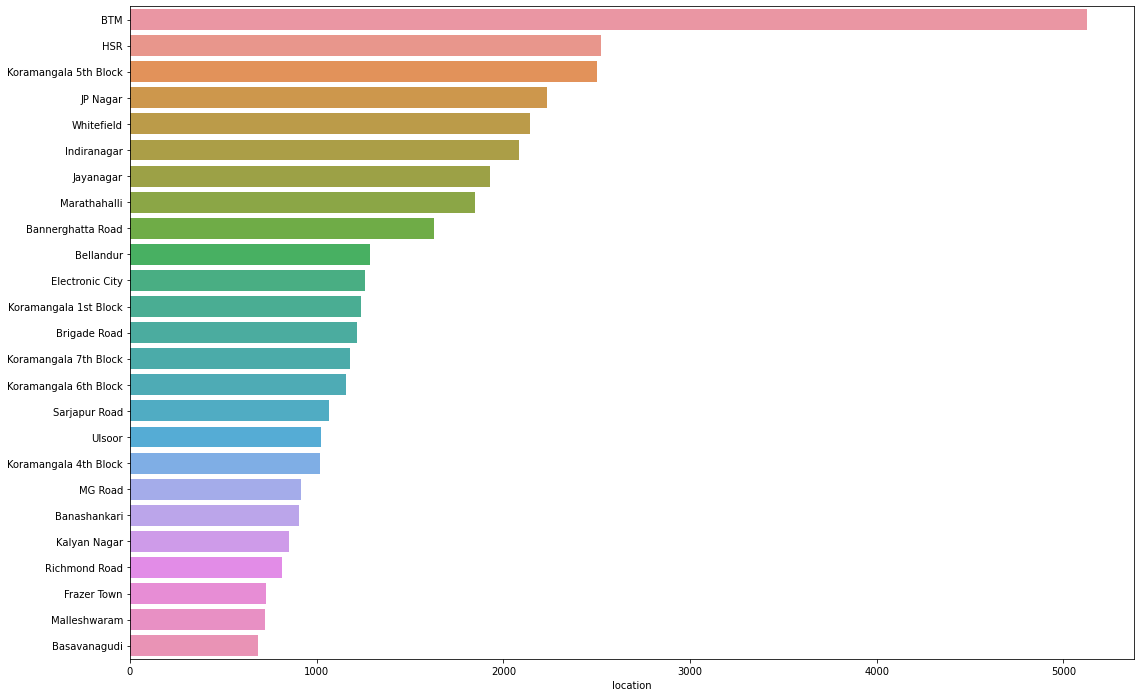

In [11]:
all = df['location'].value_counts()[:25]
fig, ax = plt.subplots(1,1, figsize=(18, 12))
sns.barplot(x = all, y = all.index)
plt.show()

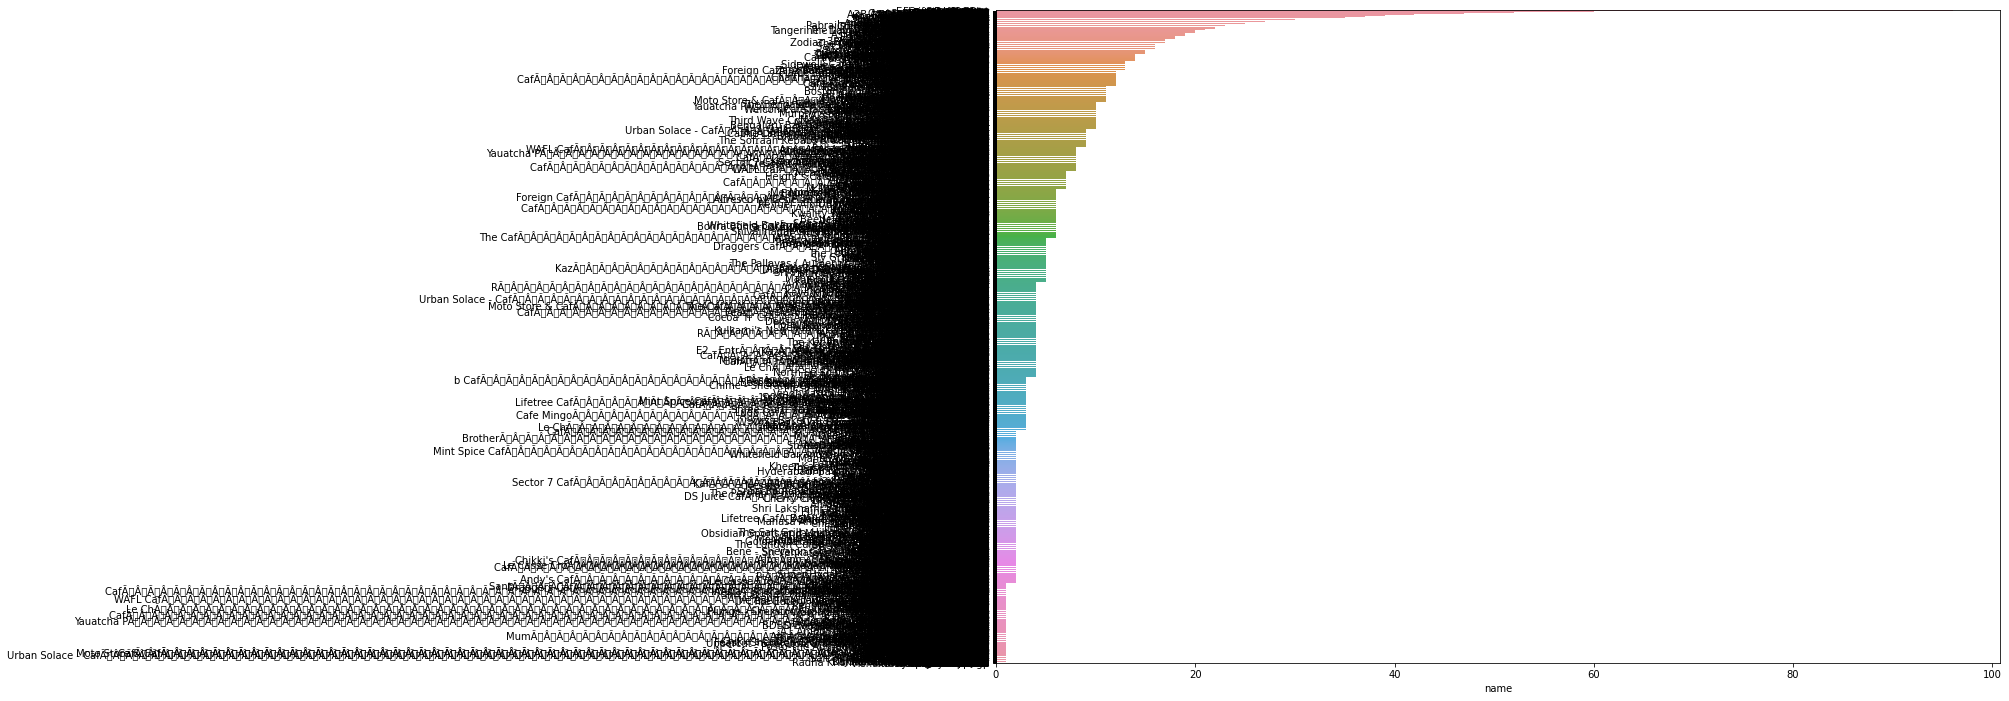

In [12]:
all = df['name'].value_counts()
fig, ax = plt.subplots(1,1, figsize=(18, 12))
sns.barplot(x = all, y = all.index)
plt.show()

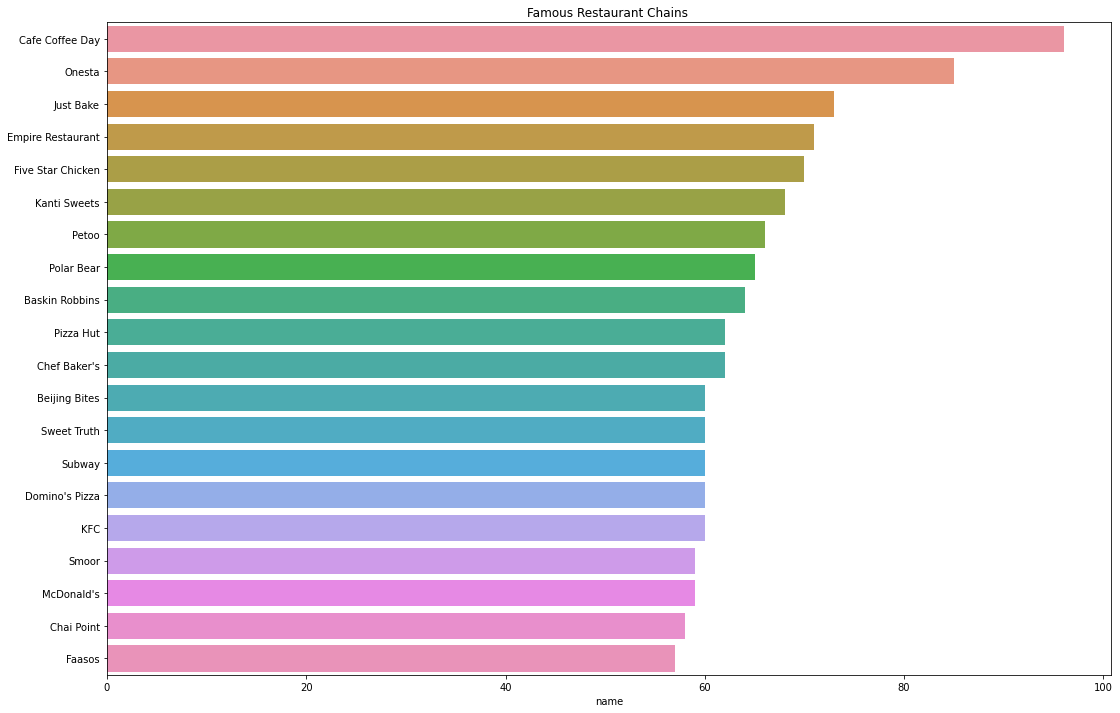

In [13]:
top_20 = df['name'].value_counts()[:20]
fig, ax = plt.subplots(1,1, figsize=(18, 12))
plt.title('Famous Restaurant Chains ')
sns.barplot(x = top_20, y = top_20.index)
plt.show()

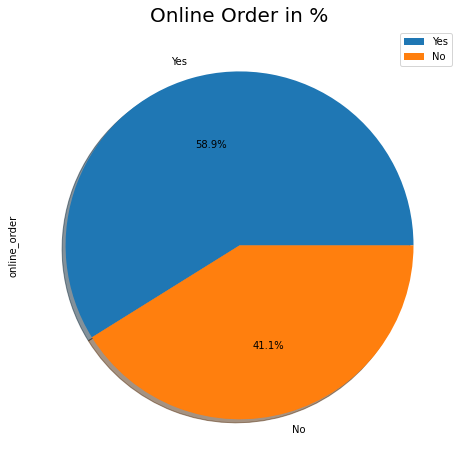

Yes    30444
No     21273
Name: online_order, dtype: int64


In [14]:
# Online Order 
plt.figure(figsize=(18, 8))
df['online_order'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Online Order in %', size=20)
plt.legend()
plt.show()
print(df['online_order'].value_counts())

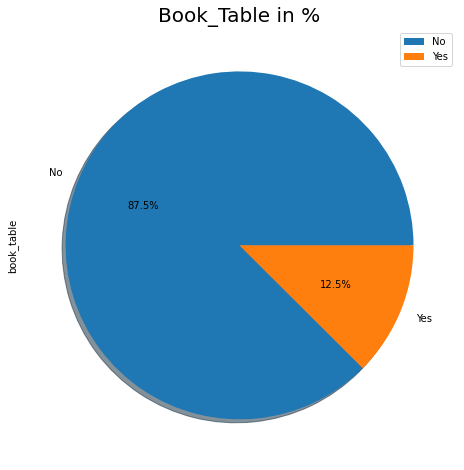

No     45268
Yes     6449
Name: book_table, dtype: int64


In [15]:
# book table 
plt.figure(figsize=(18, 8))
df['book_table'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Book_Table in %', size=20)
plt.legend()
plt.show()
print(df['book_table'].value_counts())

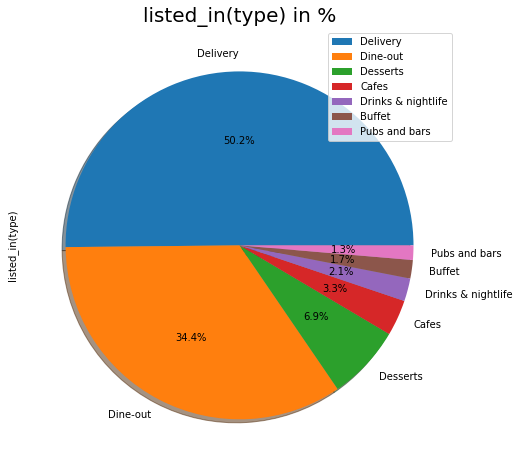

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: listed_in(type), dtype: int64


In [16]:
# listed_in  
plt.figure(figsize=(18, 8))
df['listed_in(type)'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('listed_in(type) in %', size=20)
plt.legend()
plt.show()
print(df['listed_in(type)'].value_counts())

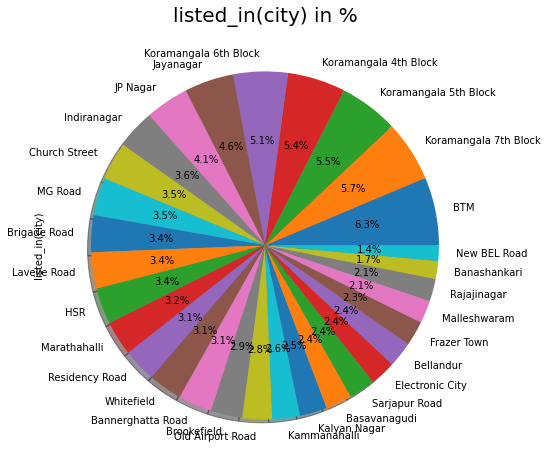

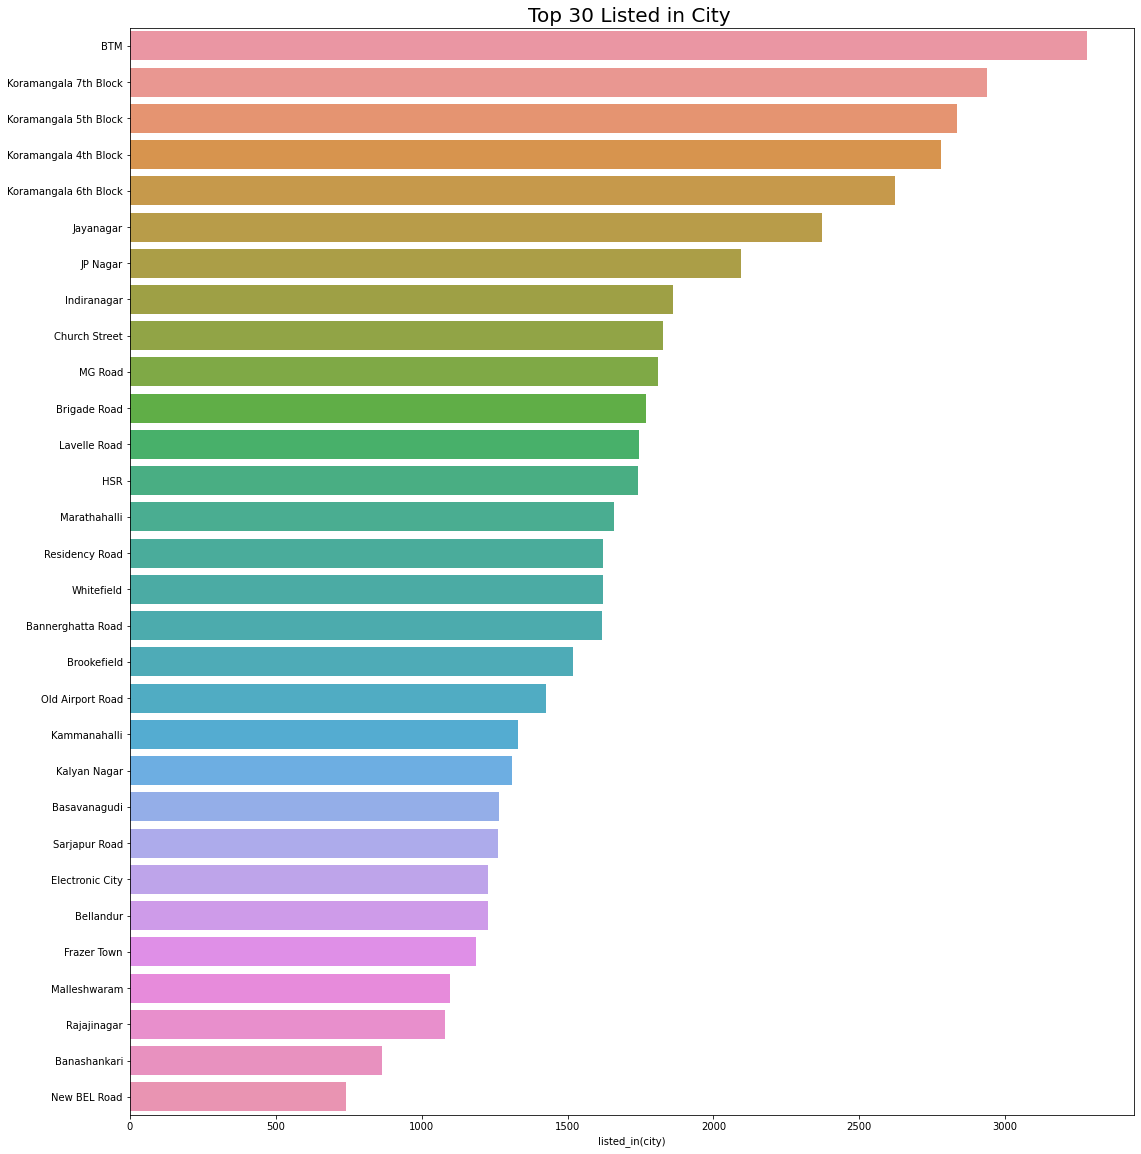

In [17]:
# listed_in  
plt.figure(figsize=(18, 8))
df['listed_in(city)'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('listed_in(city) in %', size=20)
#plt.legend().
plt.show()
plt.figure(figsize=(18, 20))

city = df['listed_in(city)'].value_counts()[:30]
sns.barplot(y= city.index, x=city)
plt.title("Top 30 Listed in City ", size=20)
plt.show()

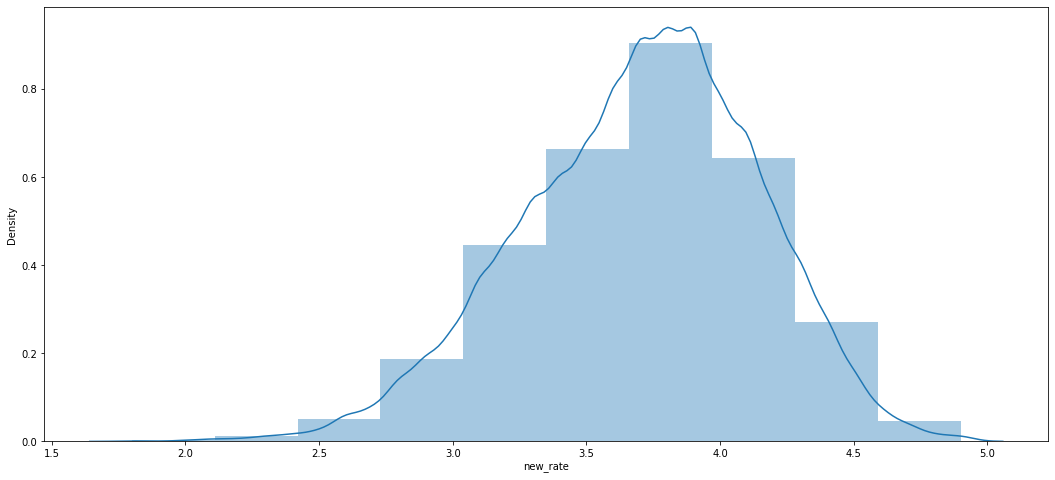

In [18]:
# Rating Distribution 
# Univariate Numerical 

df['new_rate'] = df['rate'].dropna().apply(lambda x : float(
    x.split('/')[0]) if (
        len(x)>3) else np.nan
        ).dropna()

plt.figure(figsize=(18, 8))
sns.distplot(df['new_rate'], bins=10)

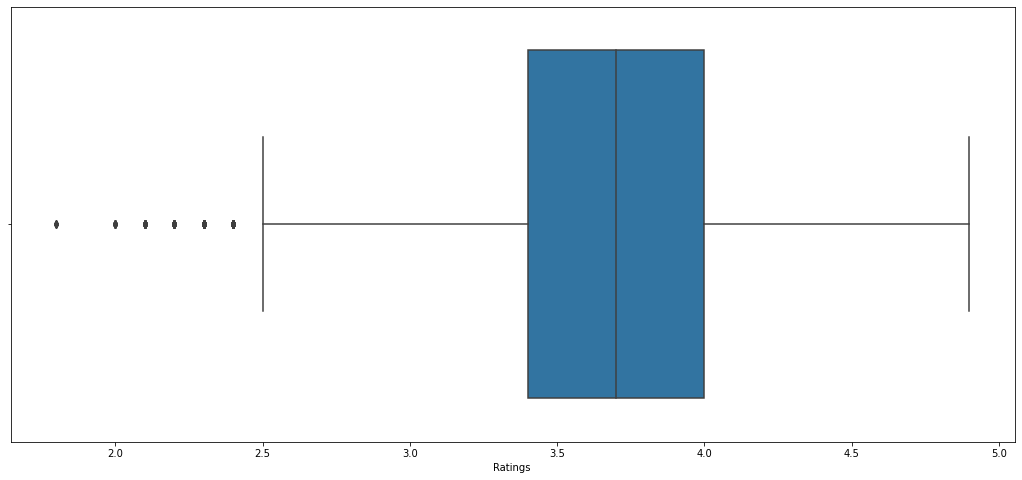

In [19]:
plt.figure(figsize=(18, 8))
sns.boxplot(df['new_rate'])
plt.xlabel('Ratings ')
plt.show()

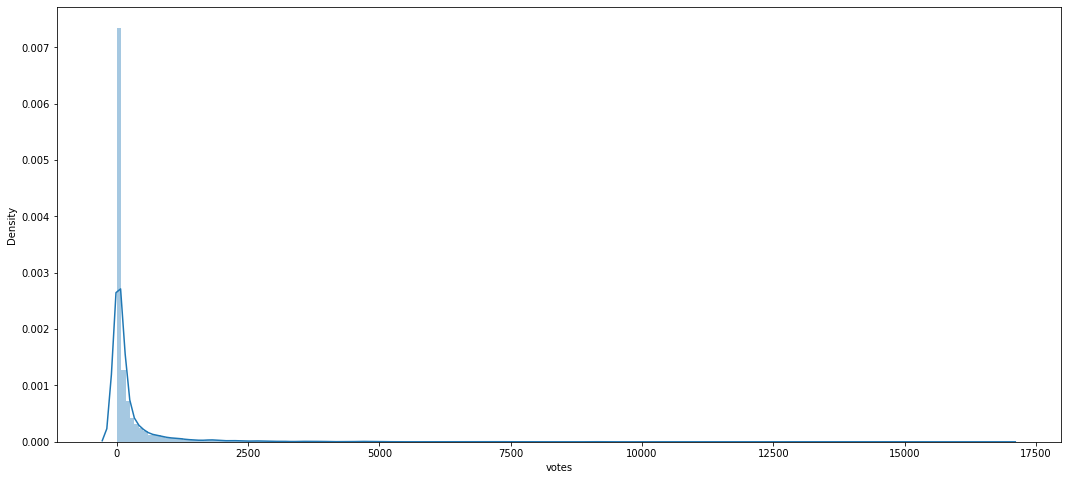

In [20]:
plt.figure(figsize=(18, 8))
sns.distplot(df['votes'].dropna(), bins=200)
plt.show()

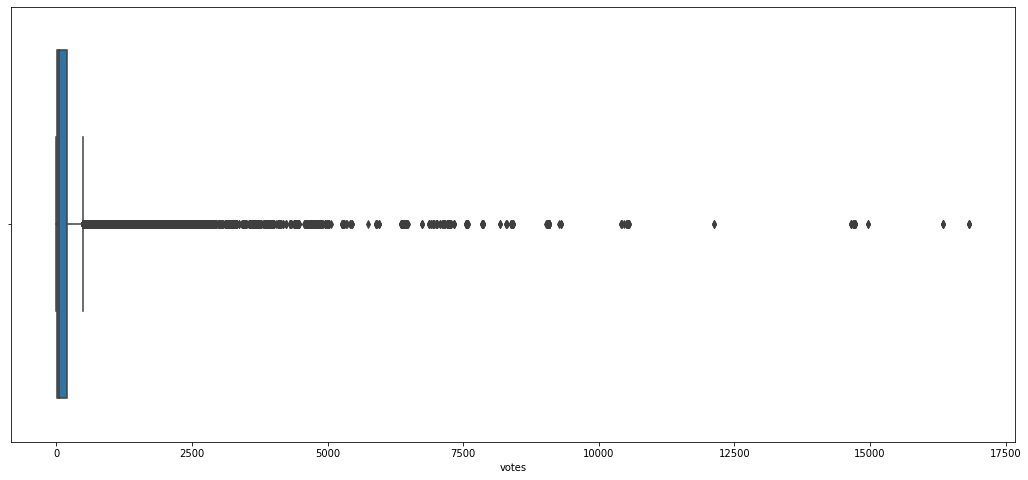

In [21]:
plt.figure(figsize=(18, 8))
sns.boxplot(df['votes'].dropna())
plt.show()

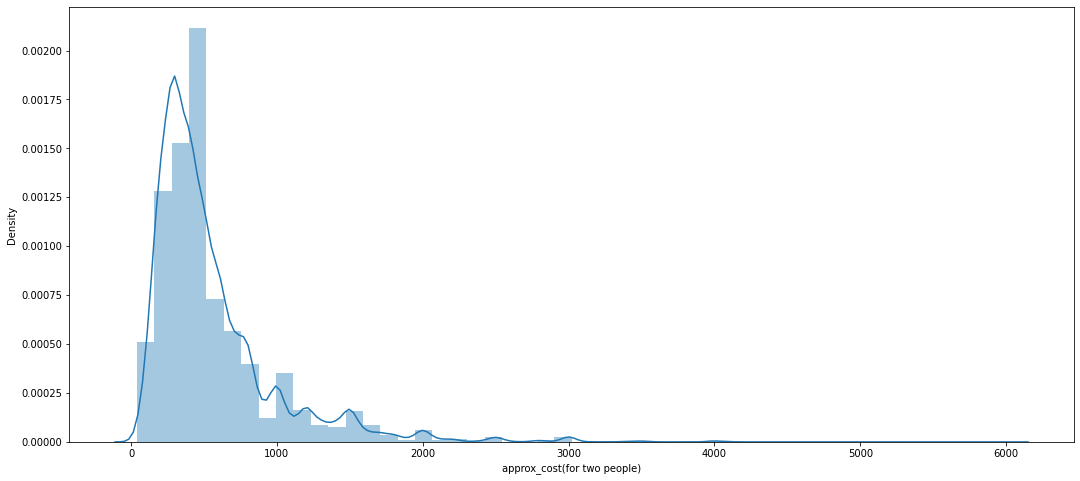

In [22]:
plt.figure(figsize=(18, 8))
sns.distplot(df['approx_cost(for two people)'].dropna())
plt.show()

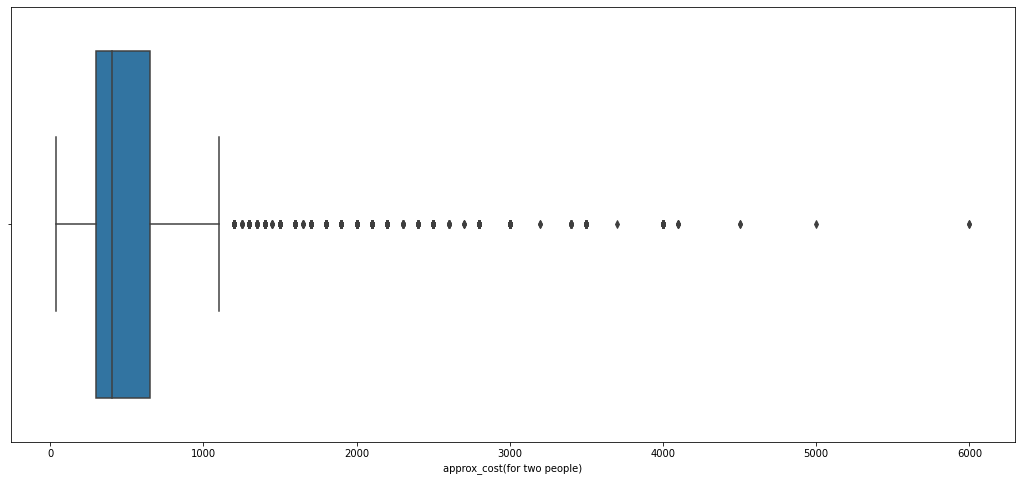

In [23]:
plt.figure(figsize=(18, 8))
sns.boxplot(df['approx_cost(for two people)'].dropna())
plt.show()

In [24]:
# I love Dosa, I will check which restaurants serve best dosa's in Bangalore 
def bestrestro(dish):
    return df.dropna()[df['dish_liked'].dropna().str.upper().str.contains(dish.upper())][['name', 'new_rate']].sort_values('new_rate', ascending=False)[:20]

In [25]:
bestrestro('dosa')

,name,new_rate
46445,CTR,4.8
46973,CTR,4.8
40161,CTR,4.7
39518,CTR,4.7
632,Taaza Thindi,4.7
40260,Sea Rock,4.6
23589,Sea Lions BBQ & Grills,4.6
2246,Hunger Camp,4.6
23152,Hunger Camp,4.6
21752,Sea Lions BBQ & Grills,4.6


In [26]:
bestrestro('cake')

,name,new_rate
36577,Biergarten,4.8
40068,O.G. Variar & Sons,4.8
37541,Biergarten,4.8
37608,Biergarten,4.8
46630,O.G. Variar & Sons,4.8
28384,Truffles,4.7
36668,Truffles,4.7
36685,ECHOES Koramangala,4.7
27806,Truffles,4.7
34779,Truffles,4.7


In [27]:
bestrestro('icecream')

,name,new_rate
23587,AB's - Absolute Barbecues,4.9
19393,AB's - Absolute Barbecues,4.9
21279,AB's - Absolute Barbecues,4.9
21770,AB's - Absolute Barbecues,4.9
10389,AB's - Absolute Barbecues,4.9
37099,AB's - Absolute Barbecues,4.9
8260,AB's - Absolute Barbecues,4.9
28150,Kurtoskalacs,4.7
18501,Natural Ice Cream,4.6
33653,Kurtoskalacs,4.6


## How location affects on online order of food? 

In [28]:
df[['location', 'online_order']][:10]

,location,online_order
0,Banashankari,Yes
1,Banashankari,Yes
2,Banashankari,Yes
3,Banashankari,No
4,Basavanagudi,No
5,Basavanagudi,Yes
6,Mysore Road,No
7,Banashankari,Yes
8,Banashankari,Yes
9,Banashankari,Yes


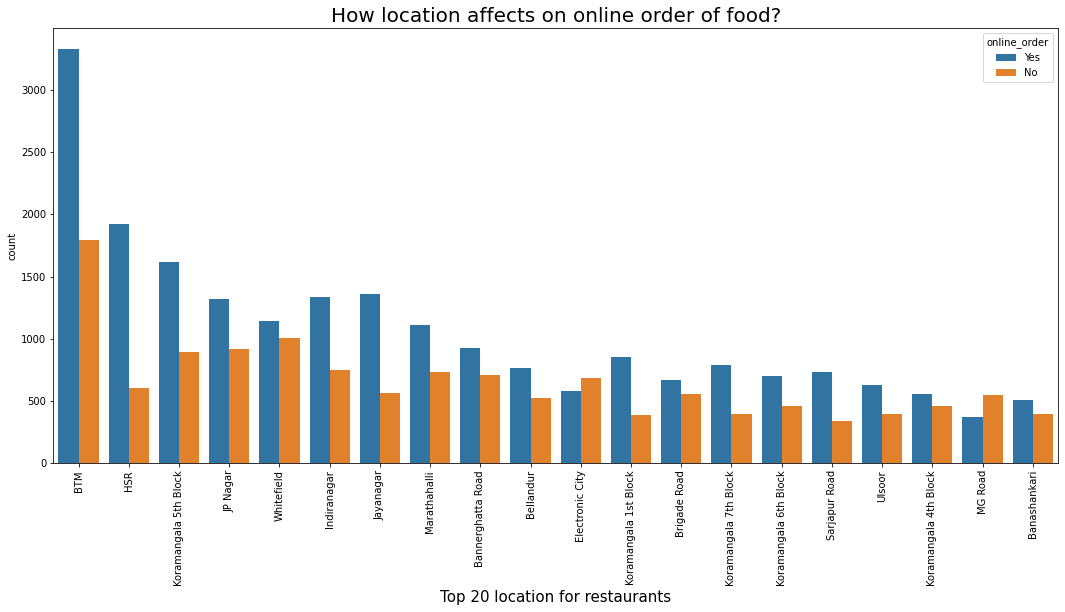

In [29]:
plt.figure(figsize=(18, 8))
order_ = df['location'].value_counts().index
sns.countplot(x=df['location'], order=order_[:20], hue=df.online_order)
plt.title('How location affects on online order of food?', size=20)
plt.xticks(rotation='vertical')
plt.xlabel('Top 20 location for restaurants', size=15)
plt.show()

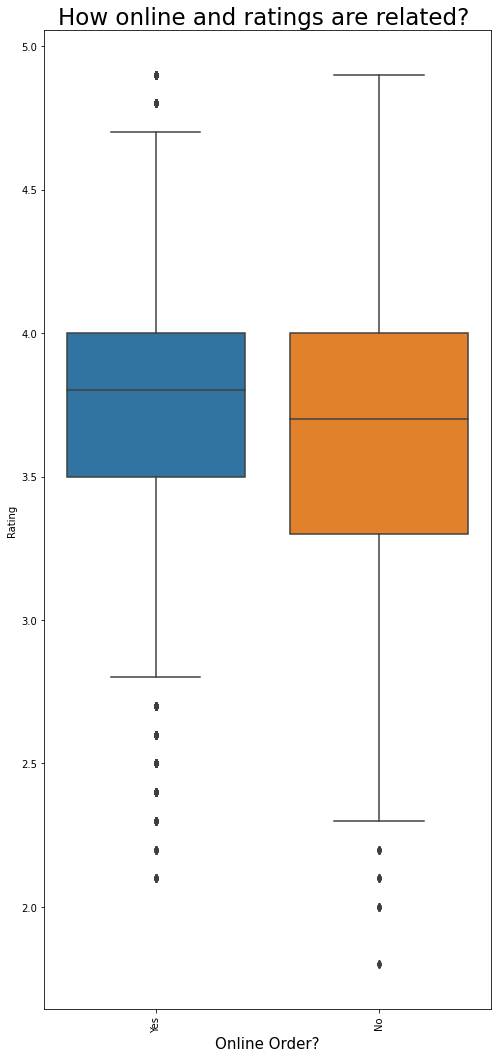

In [30]:
df[['online_order', 'new_rate']]
plt.figure(figsize=(8,18))
sns.boxplot(y=df['new_rate'], x = df['online_order'])
plt.title('How online and ratings are related? ', size=23)
plt.xticks(rotation='vertical')
plt.xlabel('Online Order?', size=15)
plt.ylabel('Rating')
plt.show()

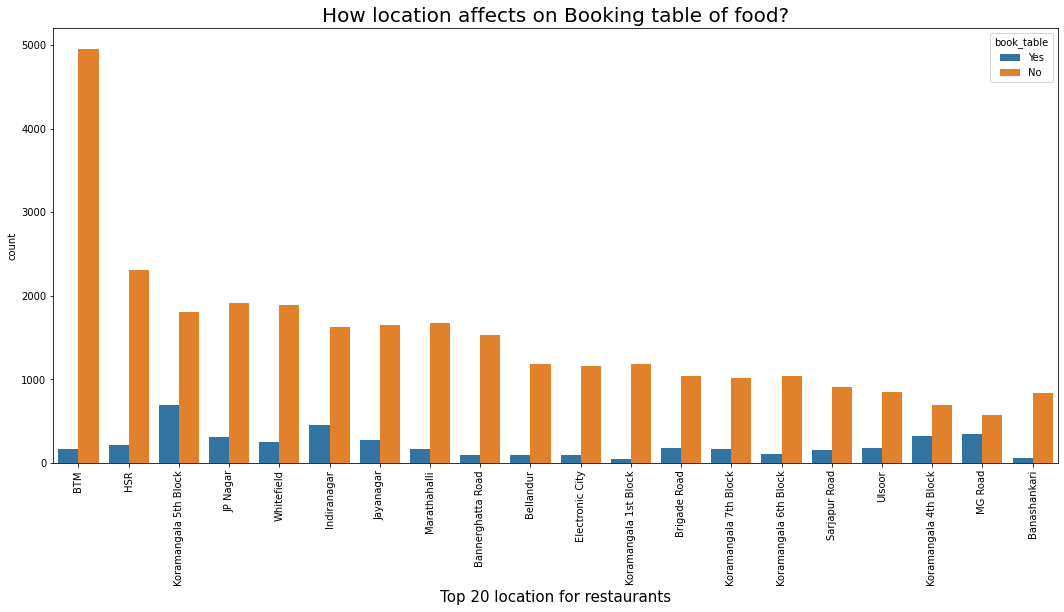

In [31]:
plt.figure(figsize=(18, 8))
order_ = df['location'].value_counts().index
sns.countplot(x=df['location'], order=order_[:20], hue=df.book_table)
plt.title('How location affects on Booking table of food?', size=20)
plt.xticks(rotation='vertical')
plt.xlabel('Top 20 location for restaurants', size=15)
plt.show()

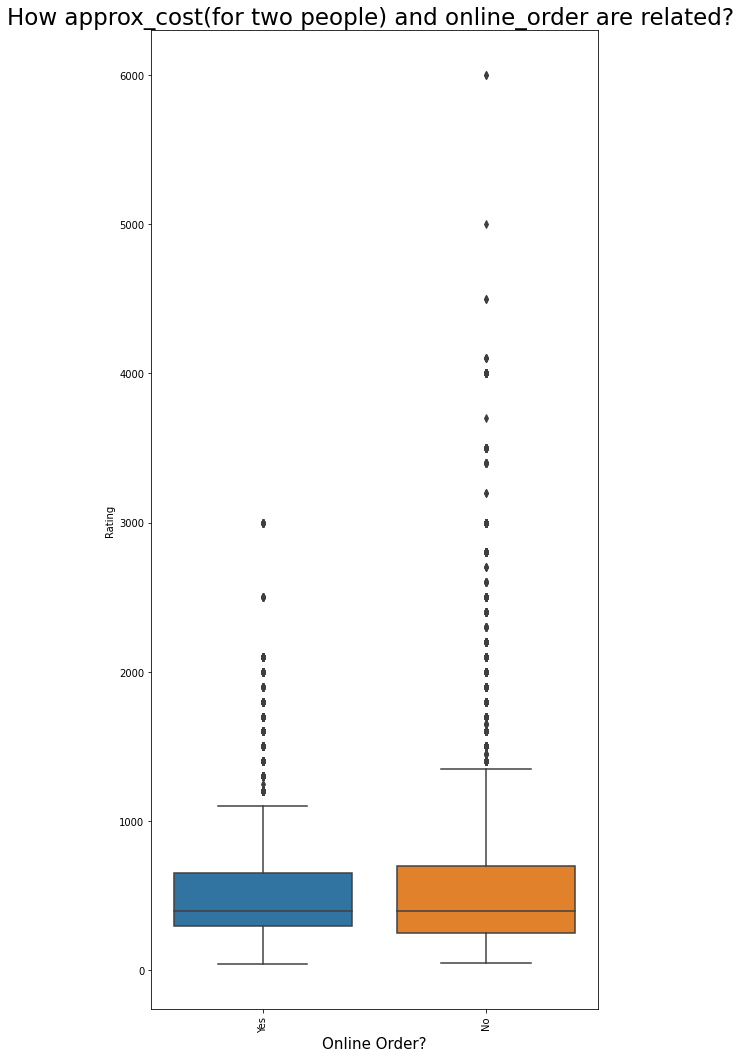

In [32]:
plt.figure(figsize=(8,18))
sns.boxplot(x=df['online_order'], y = df['approx_cost(for two people)'])
plt.title('How approx_cost(for two people) and online_order are related? ', size=23)
plt.xticks(rotation='vertical')
plt.xlabel('Online Order?', size=15)
plt.ylabel('Rating')
plt.show()

<Figure size 576x1296 with 0 Axes>

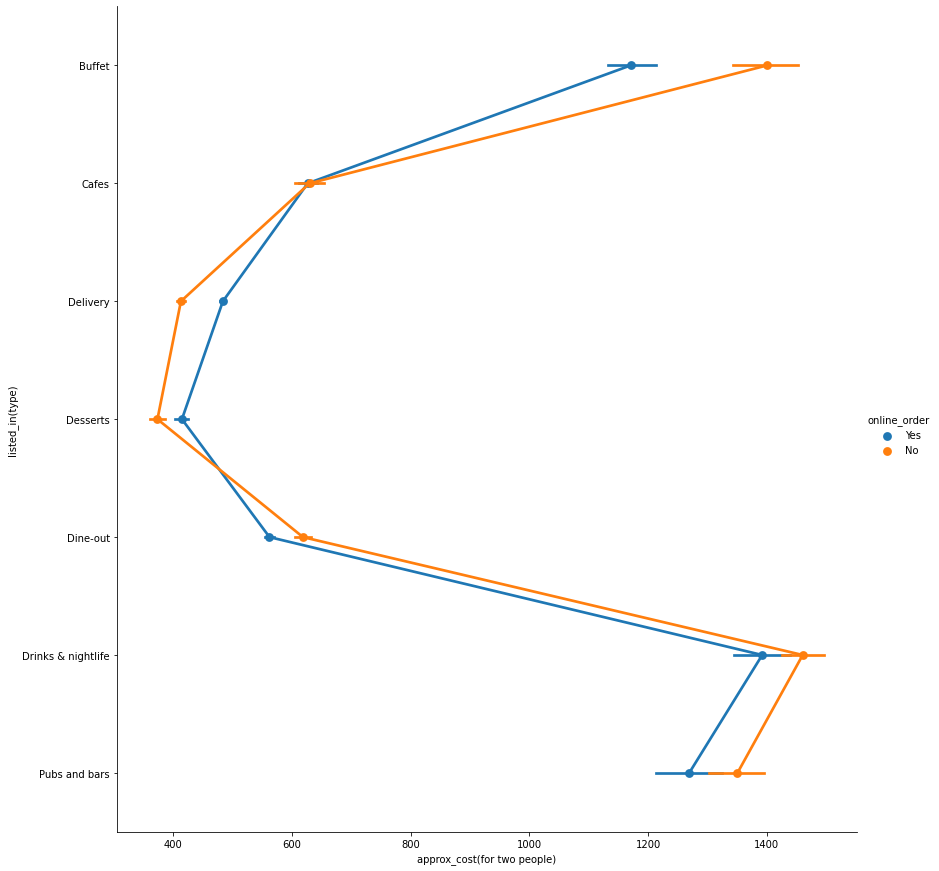

In [33]:
plt.figure(figsize=(8,18))
sns.catplot(x="approx_cost(for two people)", y="listed_in(type)", hue="online_order", kind="point", height=12, data=df)
plt.show()

<Figure size 576x1296 with 0 Axes>

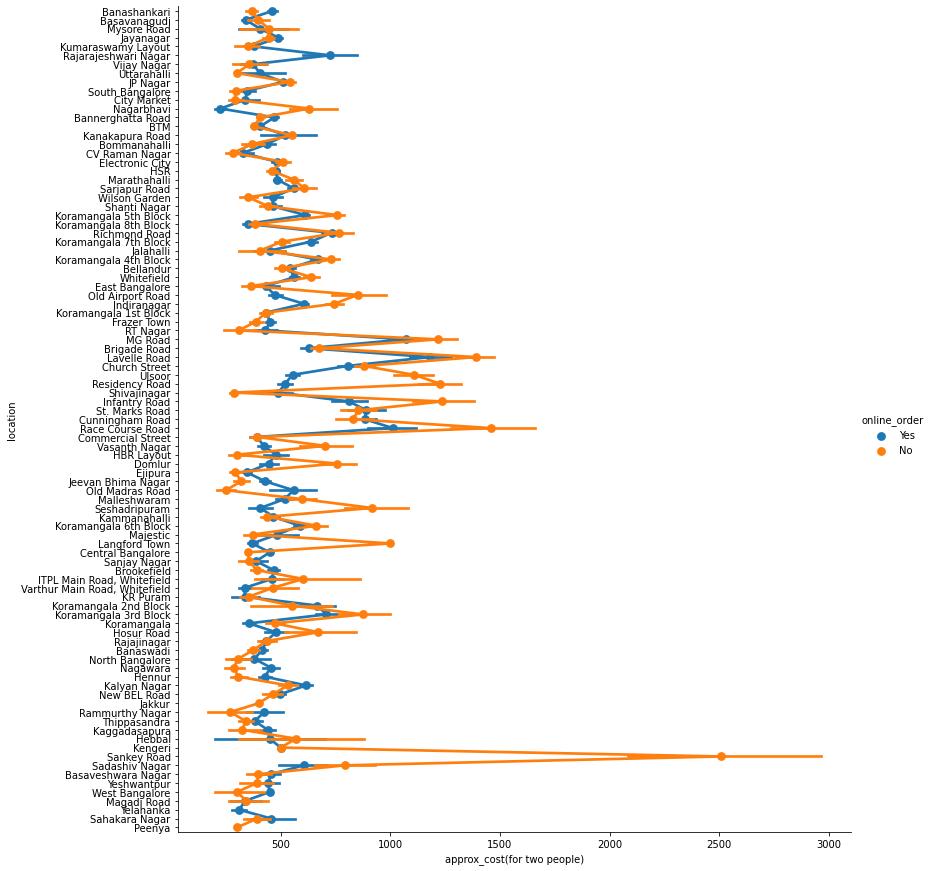

In [34]:
plt.figure(figsize=(8,18))
sns.catplot(x="approx_cost(for two people)", y="location", hue="online_order", kind="point", height=12, data=df)
plt.show()

In [35]:
df['new_dish_liked'] = df['dish_liked'].apply( lambda x : x.split(',') if type(x)==str else[''])


In [36]:
rest = df['rest_type'].value_counts()[:9].index

In [37]:
from wordcloud import WordCloud

In [38]:
def produce_wordcloud(rest):
    plt.figure(figsize=(20, 30))

    for i,r in enumerate(rest):
        plt.subplot(3, 3, i+1)
        corpus = df[df['rest_type'] ==r]['new_dish_liked'].values.tolist()

        corpus = ','.join(x for list_words in corpus for x in list_words)
        word_cloud = WordCloud(max_font_size=None, background_color = 'white', 
                               collocations=False, width=1500, height=1500).generate(corpus)
        plt.imshow(word_cloud)
        plt.title(r)
        plt.axis("off")

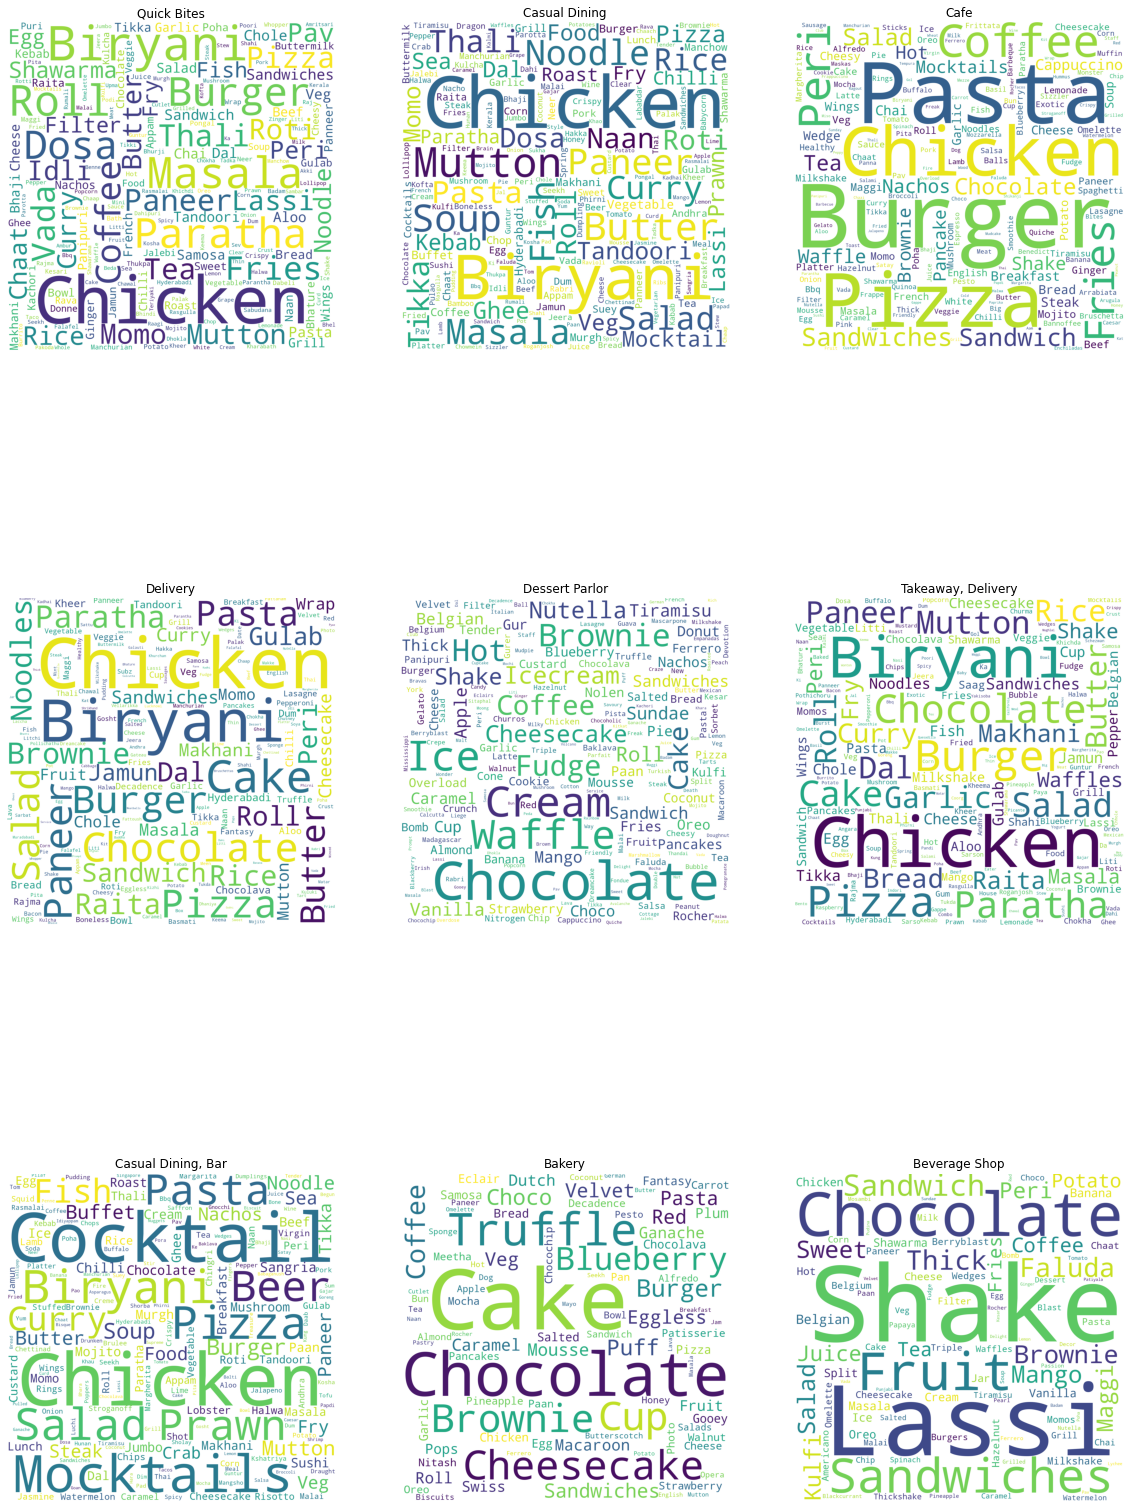

In [39]:
produce_wordcloud(rest)

In [39]:
# let' check how many null values are there and what can we do for that 

In [52]:
missing = (pd.DataFrame(df.isnull().sum())/df.shape[0])*100

In [53]:
missing['value'] = df.isnull().sum()

In [55]:
missing.columns = [['%', 'value']]

In [56]:
missing

,%,value
url,0.000000,0
address,0.000000,0
name,0.000000,0
online_order,0.000000,0
book_table,0.000000,0
rate,15.033741,7775
votes,0.000000,0
phone,2.335789,1208
location,0.040606,21
rest_type,0.438927,227


In [58]:
# so dish_liked has 28k missing values which is huge 
df.dish_liked.value_counts(dropna=False)

NaN                                                                                                28078
Biryani                                                                                              182
Chicken Biryani                                                                                       73
Friendly Staff                                                                                        69
Waffles                                                                                               68
                                                                                                   ...  
Pie, Vanilla Gelato, Mango Ice Cream, Tiramisu, Truffle, Gelato Ice Cream, Ice Cream Sandwiches        1
Garlic Bread, Chocolava, House Pizza, Spicy Paneer Pizza                                               1
Palak Paneer, Idli, Aloo Paratha, Rajma Chawal, Salads, Salad, Detox Smoothie                          1
Pork Curry, Pandi Curry                                